In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
plt.style.use('ggplot')

In [18]:
import sklearn
sklearn.__version__

'0.24.1'

In [19]:
data = pd.read_csv('outlier_remove.csv')
data.shape

(66452, 59)

In [20]:
data.head()

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
0,1mTxphc9naXMLE9qfMkEVh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0309,['The Cotton Candy Blues Band'],0.593,187286,0.450,0,0.00187,2,0.334,-10.679,1,Early in the morning,0,1940,0.0307,112.054,0.454,1940,1940-01-01,The Cotton Candy Blues Band,The Cotton Candy Blues Band187286Early in the ...,0,"money on the table , i ain ' tryna play with y...","({'num_sentences': 6, 'num_words': 783, 'num_s...",6.0,783.0,735.0,-5.036,College Graduate,0.177977,en,0.102,0.846,0.052,-0.9857,-1.0,0.000000
1,2Tp1yCGNjjZ39HTEnKaqhx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9760,['The Keynotes'],0.369,103333,0.228,0,0.00000,1,0.150,-9.628,1,I Don't Know,0,1945,0.0300,82.394,0.572,1945,1945-01-01,The Keynotes,The Keynotes103333I Don't Know0.9760.3690.2280...,0,"i don ' know why i love you like i do oh , my ...","({'num_sentences': 4, 'num_words': 186, 'num_s...",4.0,186.0,152.0,90.502,5th Grade,0.076503,en,0.294,0.455,0.251,-0.8895,-1.0,5.000000
2,3plzStfrkTOq9lehqqI3bG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3660,['EOR'],0.631,324882,0.682,0,0.00000,9,0.338,-10.486,0,Till,0,1946,0.0417,150.061,0.386,1946,1946-01-01,EOR,EOR324882Till0.3660.6310.68200.090.338-10.4860...,0,"hook : i ' just tryna be my own man , my own m...","({'num_sentences': 6, 'num_words': 495, 'num_s...",6.0,495.0,527.0,33.028,College Level,0.254582,en,0.064,0.800,0.136,0.9856,1.0,46.000000
3,2MGhUOnAifh3znlInWnywc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260,['Lowell Fulson'],0.670,170333,0.351,0,0.00531,0,0.168,-5.714,1,Fulson Blues,0,1945,0.0693,140.253,0.580,1945,1945-01-01,Lowell Fulson,Lowell Fulson170333Fulson Blues0.9260.670.3510...,0,i ain ' heard your voice in such as long time ...,"({'num_sentences': 1, 'num_words': 183, 'num_s...",1.0,183.0,179.0,-61.661,College Graduate,0.191257,en,0.109,0.817,0.074,-0.5831,-1.0,38.000000
4,1vDRvO1X021HlJY2NnqUU2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9620,['Sonny Boy Williamson I'],0.572,186227,0.164,0,0.00346,0,0.247,-15.842,1,Down South,0,1945,0.0471,78.439,0.661,1945,1945-01-01,Sonny Boy Williamson I,Sonny Boy Williamson I186227Down South0.9620.5...,0,hobo blues 3 : 22 trk yank rachel - vocal & gu...,"({'num_sentences': 8, 'num_words': 486, 'num_s...",8.0,486.0,434.0,69.626,9th Grade,0.200000,en,0.034,0.913,0.053,0.6788,1.0,60.848402


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66452 entries, 0 to 66451
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       66452 non-null  object 
 1   song                     27406 non-null  object 
 2   album                    27406 non-null  object 
 3   artist                   27406 non-null  object 
 4   acousticness_x           27406 non-null  float64
 5   danceability_x           27406 non-null  float64
 6   duration_ms_x            27406 non-null  float64
 7   energy_x                 27406 non-null  float64
 8   instrumentalness_x       27406 non-null  float64
 9   key_x                    27406 non-null  float64
 10  liveness_x               27406 non-null  float64
 11  loudness_x               27406 non-null  float64
 12  mode_x                   27406 non-null  float64
 13  speechiness_x            27406 non-null  float64
 14  tempo_x               

# baseline

In [22]:
acoustic_col= ['acousticness_y','danceability_y','duration_ms_y','energy_y','explicit','instrumentalness_y','key_y',
       'liveness_y','loudness_y','mode_y','speechiness_y','tempo_y','valence_y']
lyrics_col = ['num_words','num_syllables','readability','richness','compound','artist_popularity']

In [23]:
y = data['popularity'].copy()
X = data[acoustic_col+lyrics_col].copy()

In [24]:
X.shape

(66452, 19)

In [25]:
scale_features = X.drop(['explicit','mode_y'], axis=1).columns
scale_features.shape

(17,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [27]:
X_train_noscale = X_train.copy()
X_test_noscale = X_test.copy()

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53161, 19) (53161,)
(13291, 19) (13291,)


In [30]:
def model(X_train, y_train, X_test, y_test, scale_features):
    scaler = StandardScaler()
    scaler.fit(X_train[scale_features])
    X_train[scale_features]= scaler.transform(X_train[scale_features])
    X_test[scale_features]= scaler.transform(X_test[scale_features])
    
    model = {
      "Linear": LinearRegression(),
      "Random Forest": RandomForestRegressor(),
      "DecisionTress": DecisionTreeRegressor(),
      "SVR":SVR(kernel='rbf'),
      "XGBoost": XGBRegressor(),
      "AdaBoost": AdaBoostRegressor()
    }
    
    model_performance = []
    
    for i, k in tqdm(enumerate(model)):
        print(k)
        ml = model[k]
        print(ml)
        ml.fit(X_train, y_train)
        predictions = ml.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        rmse = math.sqrt(mean_squared_error(y_test, predictions))
        model_performance.append([k, mae, rmse])
        
    df_perform = pd.DataFrame(model_performance,columns=['Model','MAE','RMSE'])    
    return df_perform

In [43]:
%time 
perform = model(X_train, y_train, X_test, y_test, scale_features)

Wall time: 0 ns


0it [00:00, ?it/s]

Linear
LinearRegression()
Random Forest
RandomForestRegressor()


2it [01:14, 37.19s/it]

DecisionTress
DecisionTreeRegressor()


3it [01:15, 26.40s/it]

SVR
SVR()


4it [04:41, 80.37s/it]

XGBoost
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


5it [04:45, 57.23s/it]

AdaBoost
AdaBoostRegressor()


6it [04:49, 48.24s/it]


In [32]:
scaler = StandardScaler()
scaler.fit(X_train[scale_features])
X_train[scale_features]= scaler.transform(X_train[scale_features])
X_test[scale_features]= scaler.transform(X_test[scale_features])

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53161, 19) (53161,)
(13291, 19) (13291,)


In [15]:
def eval_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Random Forest

In [23]:
rf_start = time.time()

rf = RandomForestRegressor(random_state=1234)

params_rf = {'n_estimators': [10, 50, 100, 200],
            'max_depth': [10, 20, 30, 50],
            'min_samples_split':[0.001, 0.005, 0.01]
            }

grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = 10,
                       verbose = 10,
                       cv = 5
                      )

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best score:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Time taken to run: 50.2 minutes
Best score: -13.12
Best parameters: {'max_depth': 50, 'min_samples_split': 0.001, 'n_estimators': 200}


In [14]:
rf_start = time.time()

rf = RandomForestRegressor(random_state=1234)

params_rf = {'n_estimators': [200, 400, 600, 800],
            'max_depth': [20, 40, 60, 80],
            'min_samples_split':[0.0001, 0.0005, 0.001, 0.005]
            }

grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = 10,
                       verbose = 10,
                       cv = 5
                      )

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best score:", round(rf_best_score,2))
print("Best parameters:", rf_best_params

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  8.3min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed: 12.4min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 14.2min
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed: 21.6min
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed: 27.0min
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed: 31.1min
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed: 36.8min
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed: 43.9min
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed: 50.2min
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed: 58.3min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 67.8min
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed: 74.2min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 83.0min
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed: 9

Time taken to run: 159.0 minutes
Best score: -13.06
Best parameters: {'max_depth': 20, 'min_samples_split': 0.0001, 'n_estimators': 800}


In [28]:
rf_cv_result = pd.DataFrame(grid_rf.cv_results_)
rf_cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,124.159249,0.980951,0.407597,0.035183,20,0.0001,200,"{'max_depth': 20, 'min_samples_split': 0.0001,...",-12.900709,-13.182557,-13.103370,-13.322973,-12.908818,-13.083685,0.162161,25
1,249.786645,2.857015,0.778629,0.002997,20,0.0001,400,"{'max_depth': 20, 'min_samples_split': 0.0001,...",-12.886105,-13.168065,-13.072482,-13.305290,-12.896852,-13.065759,0.160432,3
2,373.075063,2.739167,1.168146,0.006534,20,0.0001,600,"{'max_depth': 20, 'min_samples_split': 0.0001,...",-12.881268,-13.158788,-13.069401,-13.293457,-12.902119,-13.061006,0.155702,2
3,501.293734,6.542952,1.572194,0.034671,20,0.0001,800,"{'max_depth': 20, 'min_samples_split': 0.0001,...",-12.881050,-13.155492,-13.068797,-13.290108,-12.900947,-13.059279,0.154573,1
4,113.490125,0.163070,0.327477,0.001068,20,0.0005,200,"{'max_depth': 20, 'min_samples_split': 0.0005,...",-12.894140,-13.179417,-13.111942,-13.324740,-12.929550,-13.087958,0.159790,26


In [63]:
def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score', model='model'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci='sd', ax=ax)
    ax.set_title("CV Grid Search Results of {}".format(model))
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

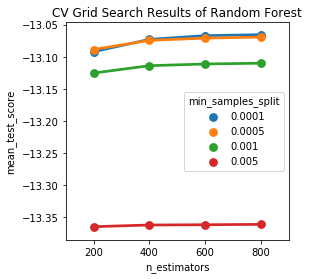

In [45]:
rf_fig = plot_cv_results(rf_cv_result, 'n_estimators', 'min_samples_split')

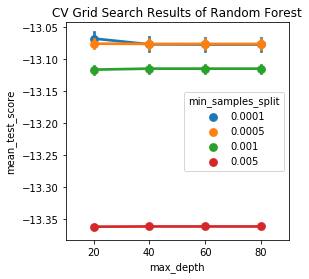

In [46]:
rf_fig = plot_cv_results(rf_cv_result, 'max_depth', 'min_samples_split')

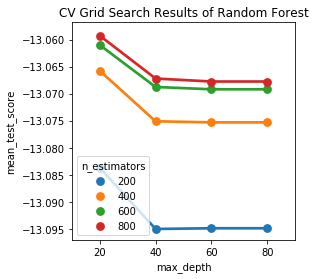

In [55]:
rf_fig = plot_cv_results(rf_cv_result[rf_cv_result.param_min_samples_split==0.0001], 'max_depth', 'n_estimators')

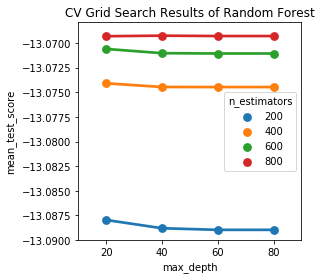

In [53]:
rf_fig = plot_cv_results(rf_cv_result[rf_cv_result.param_min_samples_split==0.0005], 'max_depth', 'n_estimators')

In [74]:
rf_start = time.time()

rf = RandomForestRegressor(random_state=1234)

params_rf = {'n_estimators': [800],
            'max_depth': [10, 15, 20],
            'min_samples_split':[0.0001]
            }

grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = 10,
                       verbose = 10,
                       cv = 5
                      )

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best score:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Time taken to run: 32.2 minutes
Best score: -13.06
Best parameters: {'max_depth': 20, 'min_samples_split': 0.0001, 'n_estimators': 800}


In [35]:
rf_best1 = RandomForestRegressor(max_depth=50, n_estimators=200, min_samples_split=0.001, random_state=1234)
rf_best1.fit(X_train, y_train)
rf_pred1 = rf_best1.predict(X_test)
rf_mae1, rf_rmse1 = eval_model(y_test, rf_pred1)
print(rf_mae1, rf_rmse1)

10.251584294486518 12.99604492296443


In [36]:
rf_best2 = RandomForestRegressor(max_depth=20, n_estimators=800, min_samples_split=0.0001, random_state=1234)
rf_best2.fit(X_train, y_train)
rf_pred2 = rf_best2.predict(X_test)
rf_mae2, rf_rmse2 = eval_model(y_test, rf_pred2)
print(rf_mae2, rf_rmse2)

10.149734564892945 12.916010622268868


# XGBOOST

In [12]:
xgb_start = time.time()

xgb = XGBRegressor(random_state=1234)

params_xgb = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [20, 40, 60, 80],
              'learning_rate': [0.001, 0.01, 0.1, 0.2]
              }

grid_xgb = GridSearchCV(estimator = xgb,
                        param_grid = params_xgb,
                        scoring = 'neg_mean_squared_error',
                        verbose = 2,
                        cv = 5)

grid_xgb.fit(X_train, y_train)

xgb_end = time.time()

xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_

print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("Best score:", round(xgb_best_score,2))
print("Best parameters:", xgb_best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END learning_rate=0.001, max_depth=20, n_estimators=100; total time=  10.3s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=100; total time=  11.2s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=100; total time=  11.2s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=100; total time=  11.5s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=100; total time=  11.2s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  23.3s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  25.2s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  23.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  23.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  23.1s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=300; total time=  35.2s
[CV] END learning_rate=0.001, max_depth=20, n_e

[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=100; total time=  27.1s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=100; total time=  26.6s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=100; total time=  26.8s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=100; total time=  26.3s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  49.2s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  48.6s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  48.5s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  52.3s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  49.5s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=300; total time=  50.5s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=300; total time=  49.8s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=300; total time=  48.7s
[CV] END ..learning_rate=0.1

In [17]:
xgb_start = time.time()

xgb = XGBRegressor(random_state=1234)

params_xgb = {'n_estimators': [200, 400, 600, 800],
              'max_depth': [20, 40, 60, 80],
              'learning_rate': [0.001, 0.01, 0.1, 0.2]
              }

grid_xgb = GridSearchCV(estimator = xgb,
                        param_grid = params_xgb,
                        scoring = 'neg_root_mean_squared_error',
                        verbose = 2,
                        cv = 5)

grid_xgb.fit(X_train, y_train)

xgb_end = time.time()

xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_

print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("Best score:", round(xgb_best_score,2))
print("Best parameters:", xgb_best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  25.6s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  27.9s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  30.1s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  25.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=  23.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=400; total time=  47.8s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=400; total time=  49.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=400; total time=  48.5s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=400; total time=  49.0s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=400; total time=  49.4s
[CV] END learning_rate=0.001, max_depth=20, n_estimators=600; total time= 1.3min
[CV] END learning_rate=0.001, max_depth=20, n_e

[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  53.6s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  52.9s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  53.9s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=200; total time=  51.2s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=400; total time=  55.2s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=400; total time=  54.2s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=400; total time=  56.4s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=400; total time= 1.1min
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=400; total time=  52.4s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=600; total time=  56.0s
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=600; total time= 1.0min
[CV] END ..learning_rate=0.1, max_depth=60, n_estimators=600; total time=  56.2s
[CV] END ..learning_rate=0.1

In [20]:
xgb_cv_result = pd.DataFrame(grid_xgb.cv_results_)
xgb_cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.147999,2.437207,0.274445,0.019977,0.001,20,200,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",-36.051650,-36.072052,-36.388496,-36.121229,-36.204623,-36.167610,0.122384,61
1,48.123144,0.481681,0.745768,0.080025,0.001,20,400,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",-30.696021,-30.756299,-31.021031,-30.796462,-30.820529,-30.818068,0.109889,57
2,76.441850,0.931278,1.165057,0.013879,0.001,20,600,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",-26.479591,-26.575725,-26.771231,-26.608229,-26.579500,-26.602855,0.094715,53
3,105.577247,1.164134,1.857806,0.115317,0.001,20,800,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",-23.180302,-23.331757,-23.465998,-23.340446,-23.255782,-23.314857,0.095267,49
4,32.123088,1.731591,0.307681,0.015984,0.001,40,200,"{'learning_rate': 0.001, 'max_depth': 40, 'n_e...",-36.068380,-36.095399,-36.411331,-36.143809,-36.230023,-36.189788,0.123663,62


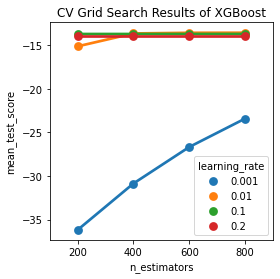

In [65]:
xgb_fig = plot_cv_results(xgb_cv_result, 'n_estimators', 'learning_rate', model='XGBoost')

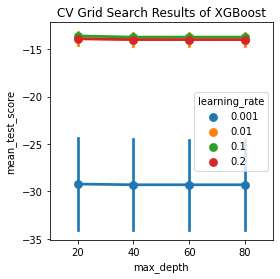

In [66]:
xgb_fig = plot_cv_results(xgb_cv_result, 'max_depth', 'learning_rate', model='XGBoost')

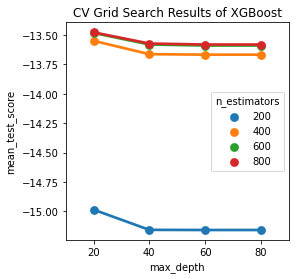

In [67]:
xgb_fig = plot_cv_results(xgb_cv_result[xgb_cv_result.param_learning_rate==0.01], 'max_depth', 'n_estimators', model='XGBoost')

In [57]:
xgb_start = time.time()

xgb = XGBRegressor(random_state=1234)

params_xgb = {'n_estimators': [800],
              'max_depth': [10, 15, 20],
              'learning_rate': [0.01]
              }

grid_xgb = GridSearchCV(estimator = xgb,
                        param_grid = params_xgb,
                        scoring = 'neg_root_mean_squared_error',
                        verbose = 2,
                        cv = 5)

grid_xgb.fit(X_train, y_train)

xgb_end = time.time()

xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_

print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("Best score:", round(xgb_best_score,2))
print("Best parameters:", xgb_best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=800; total time=  39.1s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=800; total time=  41.3s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=800; total time=  41.7s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=800; total time=  42.3s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=800; total time=  42.9s
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=800; total time= 1.5min
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=800; total time= 1.5min
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=800; total time= 1.5min
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=800; total time= 1.5min
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=800; total time= 1.5min
[CV] END .learning_rate=0.01, max_depth=20, n_estimators=800; total time= 2.4min
[CV] END .learning_rate=0.01, max_depth=20, n_est

In [39]:
xgb_best1 = XGBRegressor(max_depth=20, n_estimators=400, learning_rate=0.01, random_state=1234)
xgb_best1.fit(X_train, y_train)
xgb_pred1 = xgb_best1.predict(X_test)
xgb_mae1, xgb_rmse1 = eval_model(y_test, xgb_pred1)
print(xgb_mae1, xgb_rmse1)

10.390798934954892 13.380078149369362


In [40]:
xgb_best2 = XGBRegressor(max_depth=20, n_estimators=800, learning_rate=0.01, random_state=1234)
xgb_best2.fit(X_train, y_train)
xgb_pred2 = xgb_best2.predict(X_test)
xgb_mae2, xgb_rmse2 = eval_model(y_test, xgb_pred2)
print(xgb_mae2, xgb_rmse2)

10.335667577960153 13.306503167176711


In [34]:
xgb_best3 = XGBRegressor(max_depth=10, n_estimators=800, learning_rate=0.01, random_state=1234)
xgb_best3.fit(X_train, y_train)
xgb_pred3 = xgb_best3.predict(X_test)
xgb_mae3, xgb_rmse3 = eval_model(y_test, xgb_pred3)
print(xgb_mae3, xgb_rmse3)

9.999897482174134 12.75018186040701


In [76]:
model_perform = perform.append(pd.DataFrame({'Model':['rf_best','xgb_best'], 
                             'MAE':[rf_mae2,xgb_mae3], 'RMSE':[rf_rmse2, xgb_rmse3]}), ignore_index=True)
model_perform.sort_values(by=['RMSE'])

,Model,MAE,RMSE
7,xgb_best,9.999897,12.750182
6,rf_best,10.149735,12.916011
1,Random Forest,10.199677,13.000238
4,XGBoost,10.210843,13.004824
3,SVR,10.576340,13.474564
0,Linear,11.446465,14.263602
5,AdaBoost,12.376478,15.015190
2,DecisionTress,14.355955,18.693524


# MLI

### Feature importance

In [77]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(xgb_best3, random_state=1234).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3185 ± 0.0072,artist_popularity
0.1346 ± 0.0087,loudness_y
0.0618 ± 0.0069,acousticness_y
0.0373 ± 0.0042,duration_ms_y
0.0367 ± 0.0019,valence_y
0.0363 ± 0.0051,explicit
0.0235 ± 0.0015,danceability_y
0.0232 ± 0.0017,num_words
0.0217 ± 0.0018,richness
0.0186 ± 0.0023,num_syllables


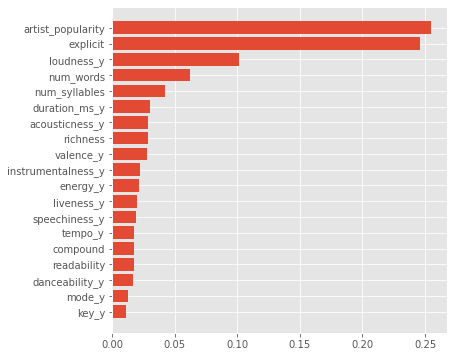

In [16]:
importance = xgb_best3.feature_importances_
feature_importance = pd.DataFrame(importance, index=X_test.columns, columns=['importance'])
feature_importance.sort_values(by=['importance'], inplace=True)
plt.figure(figsize=(6,6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.show()

In [17]:
feature_importance

,importance
key_y,0.011335
mode_y,0.012951
danceability_y,0.016908
readability,0.017224
compound,0.017548
tempo_y,0.017892
speechiness_y,0.018923
liveness_y,0.020069
energy_y,0.021267
instrumentalness_y,0.022419


### SHAP Values

In [72]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_best3)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

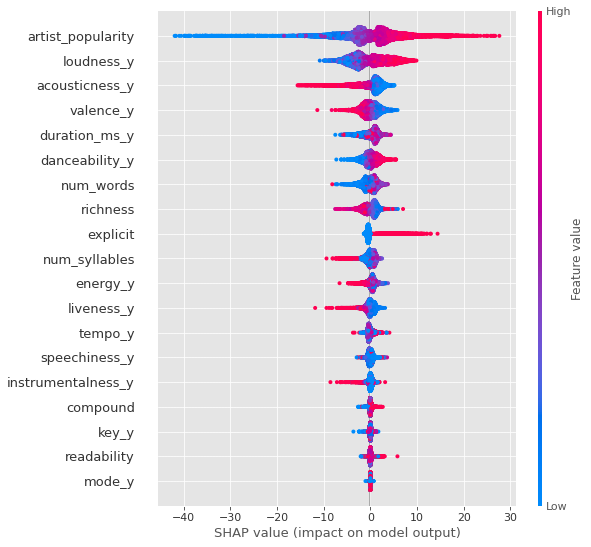

In [22]:
shap.summary_plot(shap_values, X_test)

### LIME

In [80]:
i = xgb_pred3.argmax()
X_test.iloc[i]

acousticness_y       -0.807494
danceability_y        1.279251
duration_ms_y        -0.929978
energy_y             -0.167842
explicit              1.000000
instrumentalness_y   -0.348418
key_y                -1.195098
liveness_y            2.876087
loudness_y            0.702561
mode_y                1.000000
speechiness_y        -0.041011
tempo_y              -0.535005
valence_y            -1.444887
num_words             1.313356
num_syllables         1.583438
readability           0.581530
richness              2.792449
compound              0.694861
artist_popularity     1.609185
Name: 7196, dtype: float64

In [46]:
xgb_pred3.max()

77.71741

In [47]:
data.loc[7196, 'acousticness_y':]

acousticness_y                                                        0.0804
artists                           ['Ty Dolla $ign', 'Jhené Aiko', 'Mustard']
danceability_y                                                         0.771
duration_ms_y                                                         148927
energy_y                                                               0.526
explicit                                                                   1
instrumentalness_y                                                         0
key_y                                                                      1
liveness_y                                                             0.663
loudness_y                                                            -6.844
mode_y                                                                     1
name                                By Yourself (feat. Jhené Aiko & Mustard)
popularity                                                                70

In [81]:
import lime
import lime.lime_tabular

categorical_features = np.argwhere(np.array([len(set(X_train[x])) for x in X_train.columns]) <= 20).flatten()

explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['popularity'], categorical_features=categorical_features, verbose=True, mode='regression')

In [82]:
i = xgb_pred3.argmax()
exp = explainer_lime.explain_instance(X_test.values[i], xgb_best3.predict)
exp.show_in_notebook(show_table=True)

Intercept 34.05459941366878
Prediction_local [52.40319706]
Right: 77.71741


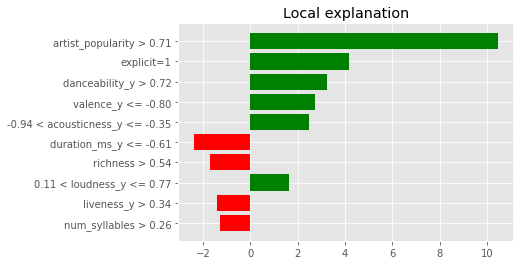

In [50]:
test_highest = exp.as_pyplot_figure()

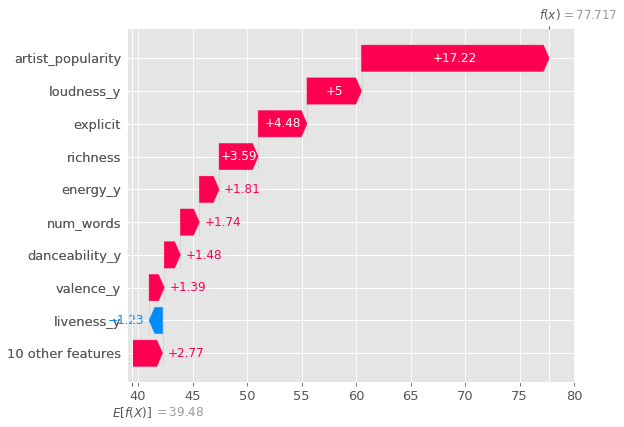

In [62]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X_test.columns)

In [51]:
i = xgb_pred3.argmin()
X_test.iloc[i]

acousticness_y       -0.928194
danceability_y        1.135269
duration_ms_y        -1.417783
energy_y              0.856663
explicit              0.000000
instrumentalness_y    4.113609
key_y                -1.195098
liveness_y            0.901927
loudness_y           -0.173067
mode_y                1.000000
speechiness_y        -0.330589
tempo_y              -0.840564
valence_y            -0.032296
num_words             3.153224
num_syllables         4.477332
readability           0.720778
richness              0.642509
compound              0.798007
artist_popularity    -3.775293
Name: 1469, dtype: float64

In [52]:
xgb_pred3.min()

-1.288751

In [53]:
data.loc[1469, 'acousticness_y':]

acousticness_y                                                          0.04
artists                                                    ['Future Rapper']
danceability_y                                                         0.747
duration_ms_y                                                         107101
energy_y                                                               0.781
explicit                                                                   0
instrumentalness_y                                                     0.869
key_y                                                                      1
liveness_y                                                             0.342
loudness_y                                                           -10.679
mode_y                                                                     1
name                                                    The Purge of History
popularity                                                                 0

In [54]:
exp = explainer_lime.explain_instance(X_test.values[i], xgb_best3.predict)
exp.show_in_notebook(show_table=True)

Intercept 46.591619659877054
Prediction_local [24.19898139]
Right: -1.288751


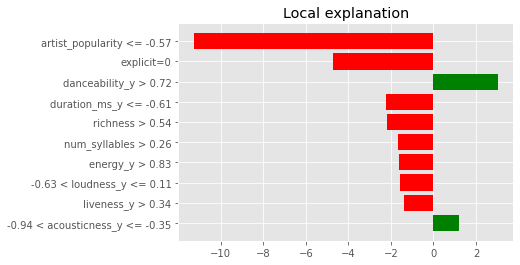

In [55]:
test_lowest = exp.as_pyplot_figure()

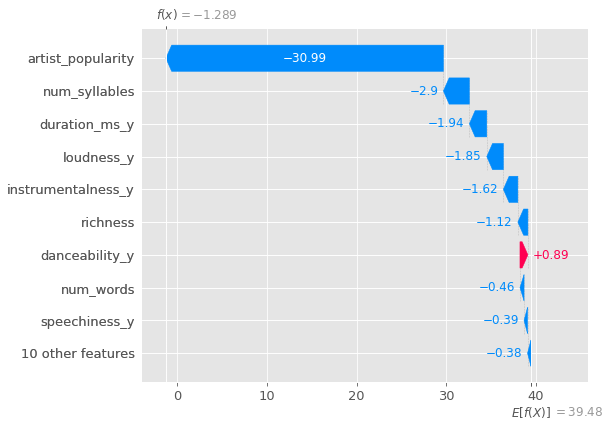

In [73]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X_test.columns)

# Feature selection

### based on XGBoost

In [76]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(xgb_best3, threshold=-np.inf, prefit=True, max_features=10)
selector.transform(X_train)
select_feat = X_train.columns[(selector.get_support())]
print(select_feat)

Index(['acousticness_y', 'duration_ms_y', 'explicit', 'instrumentalness_y',
       'loudness_y', 'valence_y', 'num_words', 'num_syllables', 'richness',
       'artist_popularity'],
      dtype='object')


In [77]:
select_X_train = selector.transform(X_train)
select_X_test = selector.transform(X_test)

xgb_select = XGBRegressor(max_depth=10, n_estimators=800, learning_rate=0.01, random_state=1234)
xgb_select.fit(select_X_train, y_train)

pred_xgb_select = xgb_select.predict(select_X_test)
xgb_mae, xgb_rmse = eval_model(y_test, pred_xgb_select)
print(xgb_mae, xgb_rmse)

10.210982609760016 12.976479330063887


### based on shapley and permutation

In [78]:
col_select = ['acousticness_y', 'duration_ms_y', 'explicit', 'danceability_y',
              'loudness_y', 'valence_y', 'num_words', 'num_syllables', 'richness',
              'artist_popularity']

X_train_select  = X_train[col_select]
X_test_select = X_test[col_select]

In [81]:
xgb_select = XGBRegressor(max_depth=10, n_estimators=800, learning_rate=0.01, random_state=1234)
xgb_select.fit(X_train_select, y_train)

pred_xgb_select = xgb_select.predict(X_test_select)
xgb_mae, xgb_rmse = eval_model(y_test, pred_xgb_select)
print(xgb_mae, xgb_rmse)

10.158270642773305 12.932033751259885
